Command Profile in TVB
----------------------

This is a simple demo showing for to interract with TVB in the command profile.

More examples can be found here:
https://github.com/the-virtual-brain/tvb-framework/tree/master/tvb/interfaces/command/demos

In [1]:
from tvb.interfaces.command.lab import *

2020-10-28 14:32:47,227 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceDBIN'>
2020-10-28 14:32:47,228 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceDWEI'>
2020-10-28 14:32:47,228 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceNETW'>
2020-10-28 14:32:47,229 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceRDA'>
2020-10-28 14:32:47,229 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceRDM'>
2020-10-28 14:32:47,230 - WARNING - tvb.config.init.introspector_registr

In [2]:
list_projects()

                    name    id
         Default_Project     1


Create a new project to test with

In [3]:
proj = new_project("sandbox")

In [4]:
list_projects()

                    name    id
         Default_Project     1
                 sandbox     2


If you have the web UI open at the same time, you'll notice there's now a new project named "sandbox_project"

In [6]:
list_datatypes(proj.id)

                    type              tag    id                              gid         date


Nothing! Let's import a connectivity

In [7]:
import os
import tvb_data
p = os.path.join(os.path.dirname(tvb_data.__file__), 'connectivity/connectivity_66.zip')
import_op = import_conn_zip(proj.id, p)

import_op = wait_to_finish(import_op)
import_op

2020-10-28 14:36:28,185 - INFO - tvb.core.services.operation_service - Starting operation ZIPConnectivityImporter
2020-10-28 14:36:31,725 - INFO - tvb.core.services.backend_clients.standalone_client - Finished with launch of operation 10
2020-10-28 14:36:31,737 - INFO - tvb.core.services.operation_service - Finished operation launch:ZIPConnectivityImporter
2020-10-28 14:36:36,743 - INFO - tvb.interfaces.command.lab - Operation finished successfully


<Operation('2c86c6c0ec8e4ec6803fdd173186b2cd', 33171300-191a-11eb-9580-faffc245676e, 2,'2','30','2020-10-28 14:36:28.192607','2020-10-28 14:36:31.309024', '2020-10-28 14:36:31.416040','5-FINISHED',True, 'None', '2020-10-28,14-36-31', '', 0)>

In [8]:
list_operation_results(import_op.id)

              id                     type                              gid         date
              19        ConnectivityIndex e939fdbdeae04183bc12a97318e437c9 2020-10-28 14:36:31.377073


Now let's grab that connectivity from the database. 
IMPORTANT: Make sure to adjust the DT gid below to match the value in the id column above and run a simulation with it.

In [9]:
simulator_model = SimulatorAdapterModel()
# ConnectivityIndex gid from the column above
simulator_model.connectivity = "e939fdbdeae04183bc12a97318e437c9"
simulator_model.simulation_length = 100
sim_op = fire_simulation(proj.id, simulator_model)
sim_op = wait_to_finish(sim_op)
sim_op

2020-10-28 14:36:50,405 - INFO - tvb.interfaces.command.lab - Operation launched ....
2020-10-28 14:36:55,935 - INFO - tvb.core.services.backend_clients.standalone_client - Finished with launch of operation 11
2020-10-28 14:37:00,421 - INFO - tvb.interfaces.command.lab - Operation finished successfully


<Operation('533bbc9fbab4428793c5e5be0f8efd39', 404017d4-191a-11eb-9580-faffc245676e, 2,'2','13','2020-10-28 14:36:50.271812','2020-10-28 14:36:53.341035', '2020-10-28 14:36:55.555435','5-FINISHED',True, 'None', '2020-10-28,14-36-55', '', 118.7998046875)>

We should wait for the simulation to finish, and afterwards, TimeSeries should also be part of this project.

Refresh the Web GUI to see the status of your operation.

In [10]:
list_operation_results(sim_op.id)

              id                     type                              gid         date
              21   SimulationHistoryIndex f060d06163c046cba9f475540dde3b36 2020-10-28 14:36:55.468313
              22    TimeSeriesRegionIndex 1cc19706362d43f982e57b71190e4b66 2020-10-28 14:36:55.521398


Populating the interactive namespace from numpy and matplotlib


/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


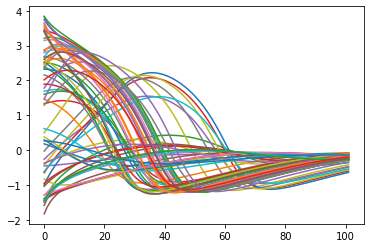

In [11]:
%pylab inline
import matplotlib.pyplot as plt

# Use TimeSeriesRegionIndex id
ts  = load_dt(22)
for reg in range(66):
    plt.plot(ts.data[:, 0, reg, 0])
plt.show()

You can re-evaluate this cell multiple times while it's running to see how the results gradually show up as the simulation finishes.